<a href="https://colab.research.google.com/github/apthagowda97/pytorch_poc/blob/master/classification/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import time
import os
import copy
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms  

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("CURRENT DEVICE:",device)

CURRENT DEVICE: cpu


In [39]:
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])

In [40]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=8,shuffle=True, num_workers=2)
testloader  = torch.utils.data.DataLoader(test_dataset, batch_size=8,shuffle=False, num_workers=2)

classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [47]:
EPOCHS = 2

In [48]:
def plot_images(inp, title=None):
    """Imshow for Tensor."""
    plt.figure(figsize=(10,10))
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.axis('off')
    if title is not None:
        plt.title(title)


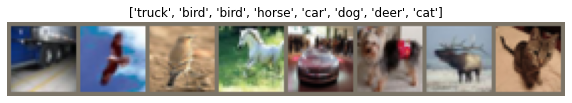

In [49]:
images, labels = next(iter(trainloader))
out = torchvision.utils.make_grid(images)
plot_images(out, title=[classes[i] for i in labels])

In [50]:
class NET(nn.Module):
    def __init__(self):
        super(NET, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [51]:
net = NET()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [52]:
for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:   
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.714
[1,  4000] loss: 1.462
[1,  6000] loss: 1.339
[2,  2000] loss: 1.246
[2,  4000] loss: 1.214
[2,  6000] loss: 1.198
Finished Training


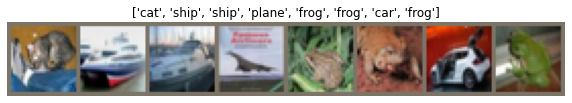

In [56]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
out = torchvision.utils.make_grid(images)
plot_images(out, title=[classes[i] for i in labels])